In [1]:
%matplotlib notebook
from sklearn.datasets import load_boston
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
house = load_boston()
print(house.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
x = house.data
y = house.target

df = pd.DataFrame(x, columns=house.feature_names)
df['Target'] = pd.DataFrame(y, columns=['Target'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<IPython.core.display.Javascript object>


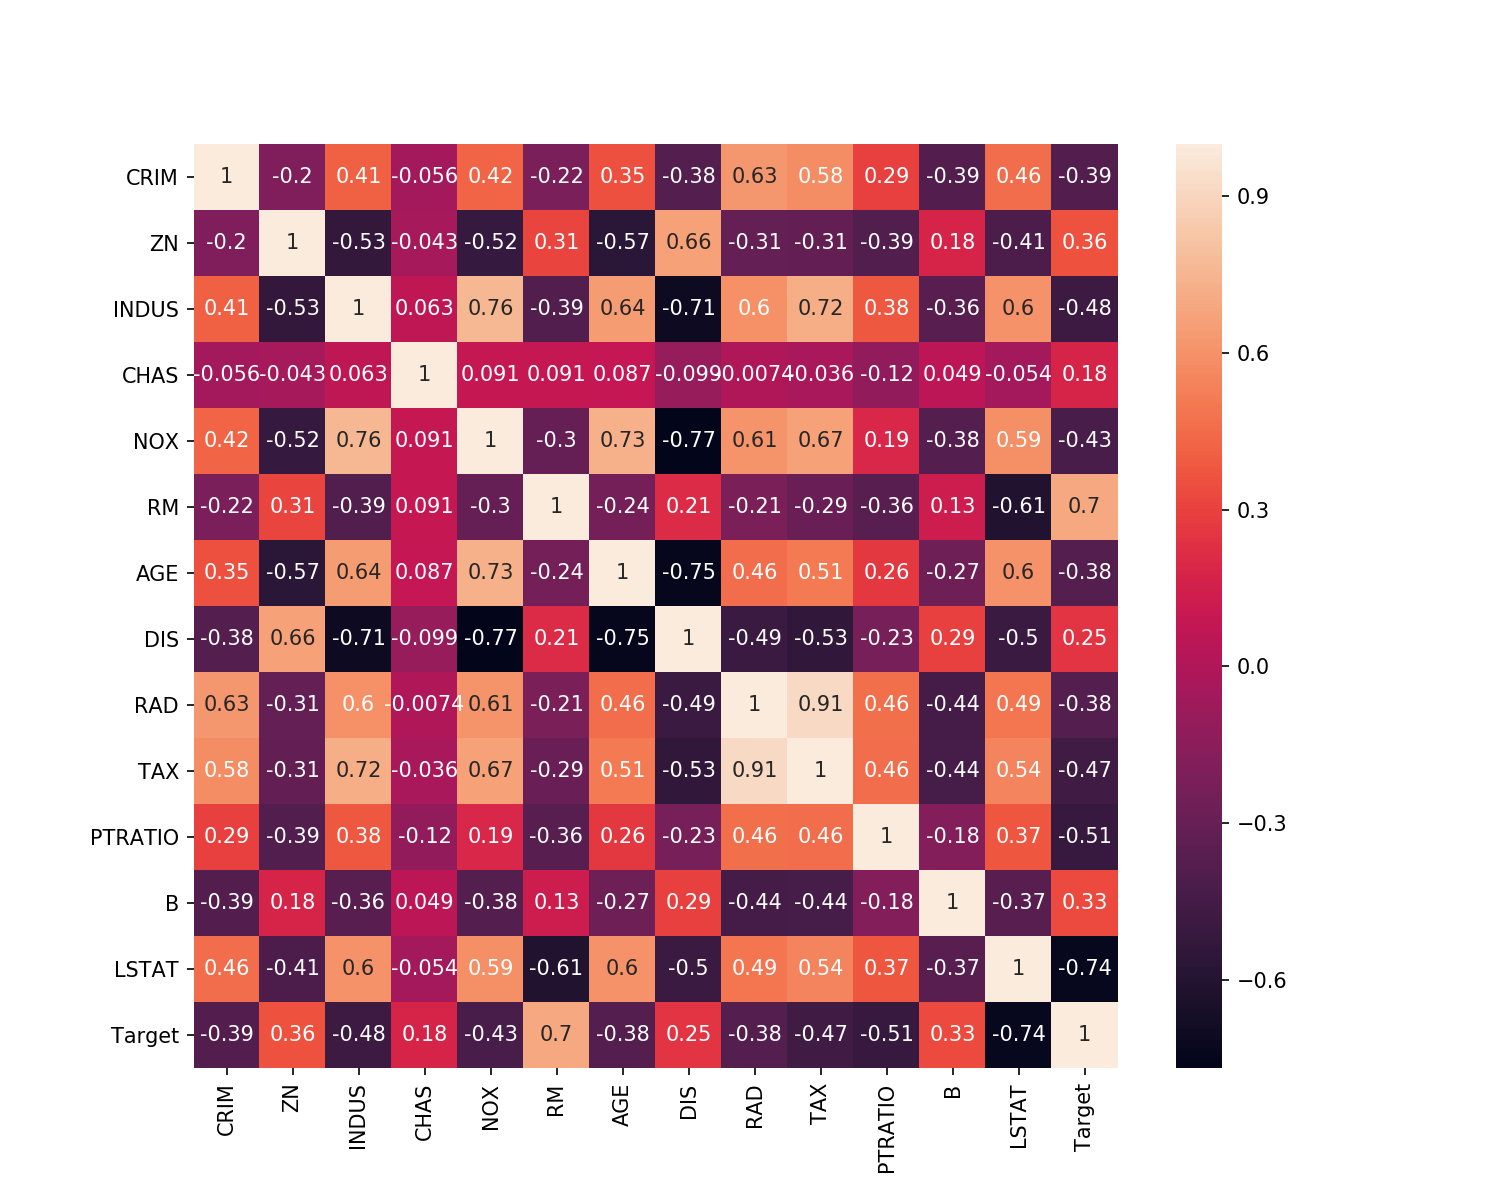

In [4]:
plt.figure(figsize=(10, 8))  
# plot the heatmap, show the correlation between two variables
sns.heatmap(df.corr(), annot=True, square=True)

In [5]:
# standardize the features
scale = StandardScaler()
xx = scale.fit_transform(x)
# split the datasets into training set and testing set
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state = 1234)

In [6]:
# create the model
model = LassoCV()
model.fit(x_train, y_train)

print(model.alpha_)
print(model.coef_)

0.6793527147371446
[-0.05704221  0.07480143 -0.05835937  0.         -0.          0.63095897
  0.01275033 -1.0666704   0.33056678 -0.01740108 -0.80173241  0.0089809
 -0.73525732]


d:\language\python\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [7]:
model.score(x_test, y_test)

0.6786403127447012